In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
cd/content/drive/MyDrive/Colab Notebooks/DO AN

/content/drive/MyDrive/Colab Notebooks/DO AN


In [156]:
#Nhập các thư viên sử dụng
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [158]:
#Đọc file dữ liệu train
path = "/content/drive/MyDrive/Colab Notebooks/DO AN/CUZUT.xlsx"
data = pd.read_excel(path)


In [159]:
#Lấy dữ liệu Giờ
data['Datetime'] = pd.to_datetime(data['Giờ']) 
data['Hour'] = data['Datetime'].dt.hour
del data['Datetime']

In [160]:
data.head(10)

,Ngày,Thứ,Giờ,Cường độ bức xạ nghiêng No1 (POA) (W/m2),Nhiệt độ không khí TB giờ (Độ C),Độ ẩm TB giờ (%),Hướng gió TB giờ (Độ),Tốc độ gió TB giờ (m/s),Áp suất không khí TB giờ (Hpa),Hour
0,2020-12-28,1900-01-02,2016-12-28 01:00:00.048,0.00,21.39,80.67,82.17,2.92,975.04,1
1,NaT,NaT,2016-12-28 02:00:00.048,0.00,21.10,82.85,85.56,2.39,974.45,2
2,NaT,NaT,2016-12-28 03:00:00.048,0.00,20.67,84.08,85.06,1.77,973.81,3
3,NaT,NaT,2016-12-28 04:00:00.048,0.00,20.33,85.17,95.42,1.47,973.52,4
4,NaT,NaT,2016-12-28 05:00:00.048,0.00,18.68,93.78,182.58,0.36,973.71,5
5,NaT,NaT,2016-12-28 06:00:00.048,0.00,18.76,92.69,117.01,0.63,974.23,6
6,NaT,NaT,2016-12-28 07:00:00.048,54.28,19.70,89.38,116.27,1.19,974.87,7
7,NaT,NaT,2016-12-28 08:00:00.048,318.15,22.16,80.60,147.03,0.95,975.80,8
8,NaT,NaT,2016-12-28 09:00:00.048,553.91,23.74,72.24,85.69,3.13,976.51,9
9,NaT,NaT,2016-12-28 10:00:00.048,706.78,25.24,65.14,81.37,3.92,976.55,10


Text(0.5, 1.0, 'Cường độ bức xạ trung bình theo giờ')

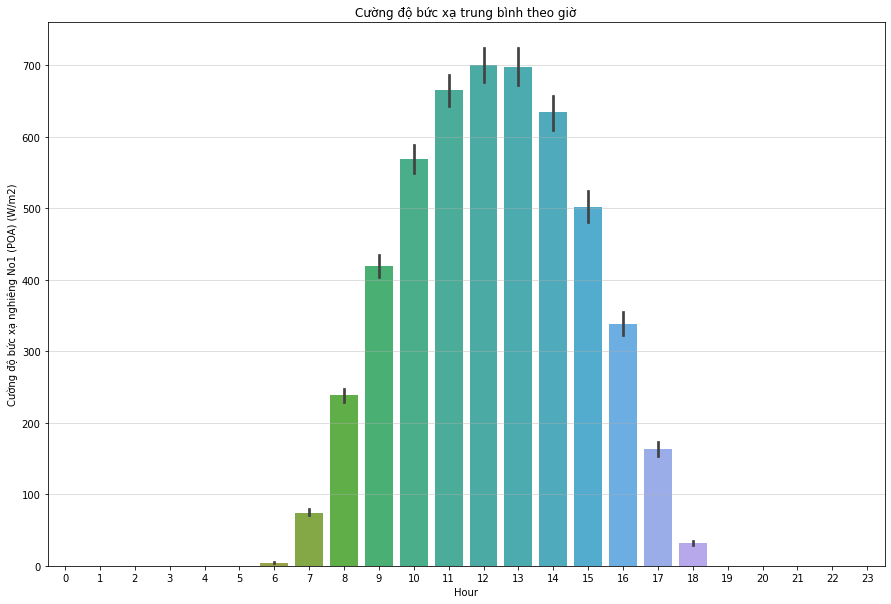

In [161]:
#Cường độ bức xạ trung bình theo giờ
plt.figure(figsize=(15,10))
plt.grid(alpha=0.5)
sns.barplot(data=data, x="Hour", y="Cường độ bức xạ nghiêng No1 (POA) (W/m2)", estimator=np.mean)
plt.title("Cường độ bức xạ trung bình theo giờ")

Text(0.5, 1.0, 'Cường độ bức xạ theo Nhiệt độ không khí TB giờ')

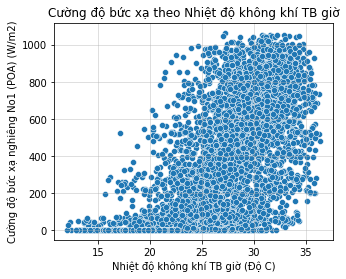

In [162]:
#Cường độ bức xạ theo Nhiệt độ không khí TB giờ
plt.figure(figsize=(5,4))
plt.grid(alpha=0.5)
sns.scatterplot(data = data, x= "Nhiệt độ không khí TB giờ (Độ C)", y="Cường độ bức xạ nghiêng No1 (POA) (W/m2)")
plt.title("Cường độ bức xạ theo Nhiệt độ không khí TB giờ")

Text(0.5, 1.0, 'Cường độ bức xạ theo Độ ẩm TB giờ')

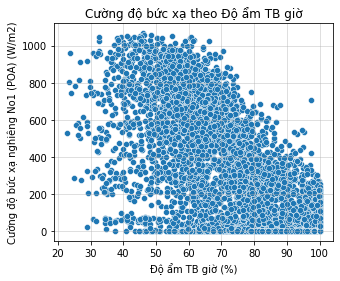

In [163]:
#Cường độ bức xạ theo Độ ẩm TB giờ
plt.figure(figsize=(5,4))
plt.grid(alpha=0.5)
sns.scatterplot(data = data, x= "Độ ẩm TB giờ (%)", y="Cường độ bức xạ nghiêng No1 (POA) (W/m2)")
plt.title("Cường độ bức xạ theo Độ ẩm TB giờ")

Text(0.5, 1.0, 'Cường độ bức xạ theo Hướng gió TB giờ')

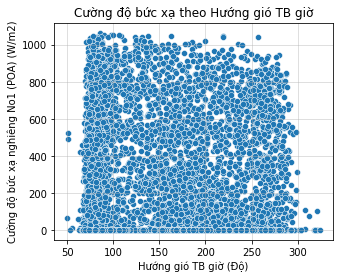

In [164]:
#Cường độ bức xạ theo Hướng gió TB giờ
plt.figure(figsize=(5,4))
plt.grid(alpha=0.5)
sns.scatterplot(data = data, x= "Hướng gió TB giờ (Độ)", y="Cường độ bức xạ nghiêng No1 (POA) (W/m2)")
plt.title("Cường độ bức xạ theo Hướng gió TB giờ")

Text(0.5, 1.0, 'Cường độ bức xạ theo Tốc độ gió TB giờ')

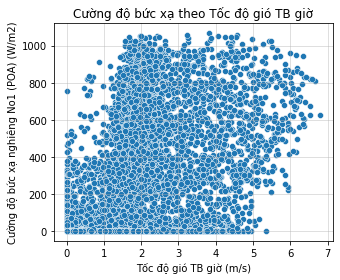

In [165]:
#Cường độ bức xạ theo Tốc độ gió TB giờ
plt.figure(figsize=(5,4))
plt.grid(alpha=0.5)
sns.scatterplot(data = data, x= "Tốc độ gió TB giờ (m/s)", y="Cường độ bức xạ nghiêng No1 (POA) (W/m2)")
plt.title("Cường độ bức xạ theo Tốc độ gió TB giờ")

Text(0.5, 1.0, 'Cường độ bức xạ theo Áp suất không khí TB giờ')

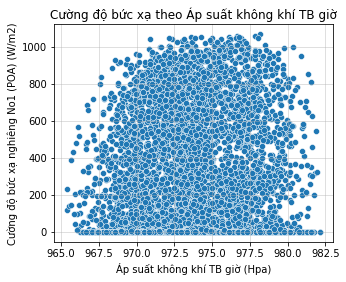

In [166]:
#Cường độ bức xạ theo Áp suất không khí TB giờ
plt.figure(figsize=(5,4))
plt.grid(alpha=0.5)
sns.scatterplot(data = data, x= "Áp suất không khí TB giờ (Hpa)", y="Cường độ bức xạ nghiêng No1 (POA) (W/m2)")
plt.title("Cường độ bức xạ theo Áp suất không khí TB giờ")

In [167]:
#Chia tập dữ liệu thành các biến đầu vào và đầu ra
cot = ["Nhiệt độ không khí TB giờ (Độ C)","Độ ẩm TB giờ (%)","Hướng gió TB giờ (Độ)","Tốc độ gió TB giờ (m/s)","Áp suất không khí TB giờ (Hpa)","Hour"]
x = data[cot].values
y = data["Cường độ bức xạ nghiêng No1 (POA) (W/m2)"].values

In [168]:
#Chia tập dữ liệu thành các tập train và test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=7)

Số cây:  1
Score:  0.8946532420050411
Số cây:  2
Score:  0.9185213785369412
Số cây:  3
Score:  0.9265706328723021
Số cây:  4
Score:  0.9314347392421576
Số cây:  5
Score:  0.93433655572734
Số cây:  6
Score:  0.9373258159300537
Số cây:  7
Score:  0.9387700548708623
Số cây:  8
Score:  0.939036178677543
Số cây:  9
Score:  0.9396569070738087
Số cây:  10
Score:  0.9398963244820782
Số cây:  11
Score:  0.9415870794165581
Số cây:  12
Score:  0.9426632282262654
Số cây:  13
Score:  0.9439686515322553
Số cây:  14
Score:  0.9446112137445065
Số cây:  15
Score:  0.9444435585105423
Số cây:  16
Score:  0.9451328124140822
Số cây:  17
Score:  0.9455792057070307
Số cây:  18
Score:  0.9458441645818061
Số cây:  19
Score:  0.9459507239732016
Số cây:  20
Score:  0.9456498914674022
Số cây:  21
Score:  0.945538609251929
Số cây:  22
Score:  0.9455785324795849
Số cây:  23
Score:  0.9454639400283759
Số cây:  24
Score:  0.945843693656484
Số cây:  25
Score:  0.9461530624648193
Số cây:  26
Score:  0.9466835647014176


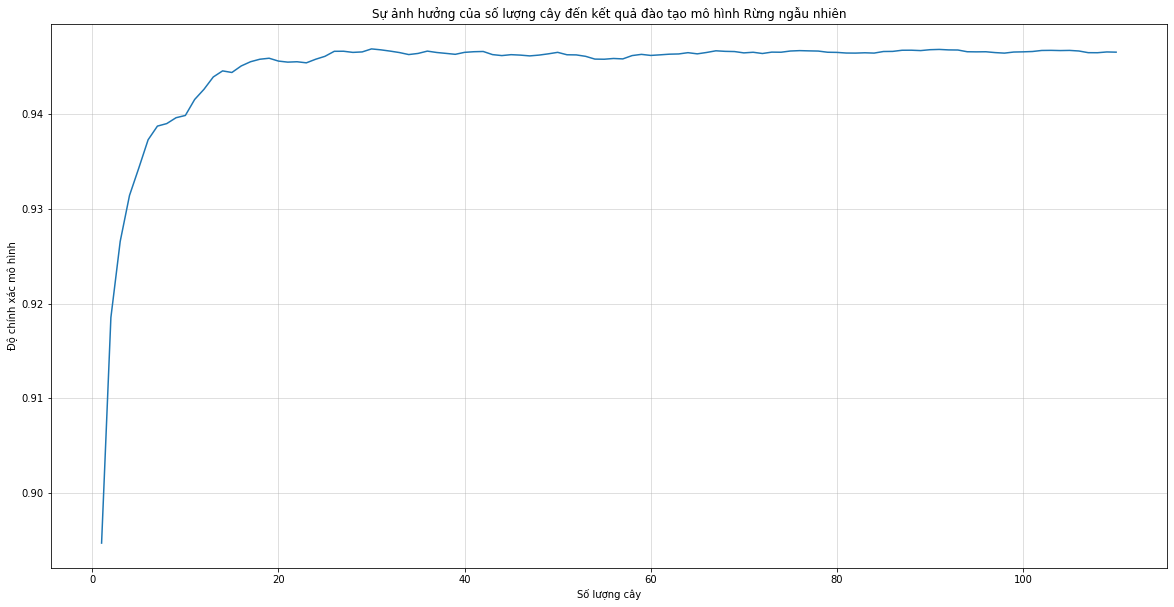

In [171]:
#Chọn số lượng cây cho thuật toán Rừng ngẫu nhiên
Tree = []
Score = []
for i in range(1,111):
  Tree.append(i)
  print("Số cây: ",i)
  model = RandomForestRegressor(n_estimators=i,random_state=7)
  model.fit(x_train, y_train)
  Score.append(model.score(x_test, y_test))
  print("Score: ",model.score(x_test, y_test))
plt.figure(figsize=(20,10))
plt.grid(alpha=0.5)
plt.plot(Tree, Score)
plt.xlabel("Số lượng cây")
plt.ylabel("Độ chính xác mô hình")
plt.title("Sự ảnh hưởng của số lượng cây đến kết quả đào tạo mô hình Rừng ngẫu nhiên")
max_score = Score[0]
max=0
for i in Tree:
  if (max_score <= Score[i-1]):
    max_score = Score[i-1]
    max = i-1
print("Điểm chính xác của mô hình tốt nhất: ",Score[max])

In [172]:
#Dự đoán
e=10^-8
model = RandomForestRegressor(n_estimators=max+1,random_state=7)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
kqrf = pd.DataFrame({"Thực tế":y_test, "Dự đoán":y_pred, "MAPE":abs((y_test-y_pred) / (y_test+e))})
kqrf

,Thực tế,Dự đoán,MAPE
0,917.30,782.672000,0.149040
1,51.69,91.891667,1.066640
2,0.00,0.127333,0.009095
3,0.00,0.000000,0.000000
4,0.00,0.000000,0.000000
...,...,...,...
860,0.00,3.487333,0.249095
861,560.32,546.284000,0.025692
862,0.00,0.000000,0.000000
863,0.00,0.000000,0.000000


In [173]:
# Lưu file kết quả
kqrf.to_csv('kqrf.csv')

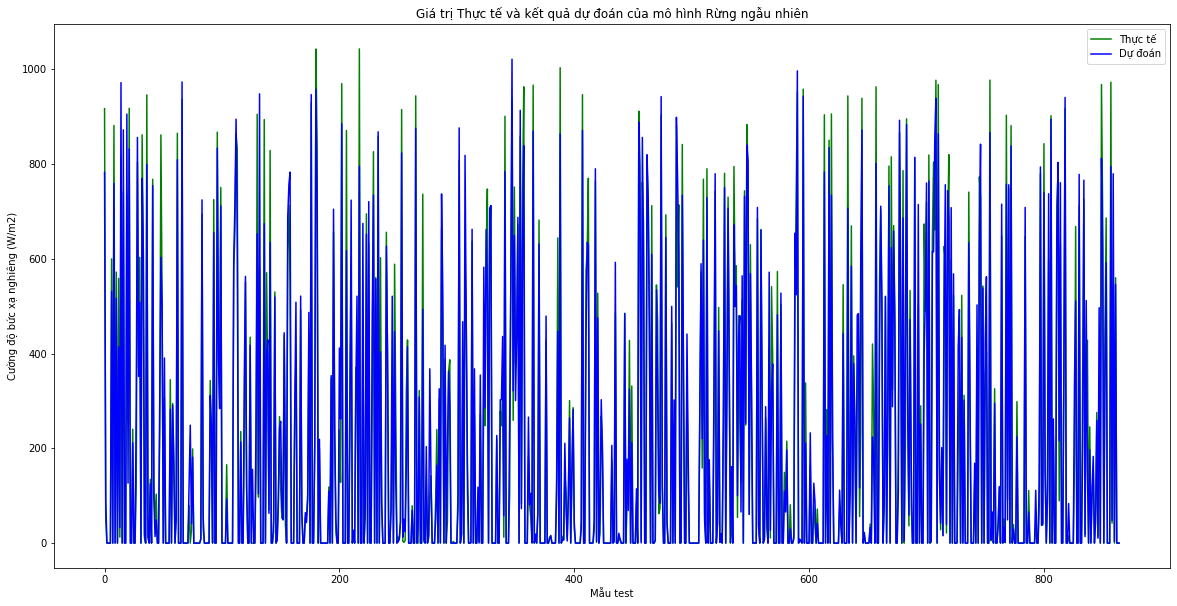

In [174]:
# Vẽ đồ thị giá trị
plt.figure(figsize=(20,10))
plt.plot(y_test, color = 'green', label = 'Thực tế')
plt.plot(y_pred, color = 'blue', label = 'Dự đoán')
plt.xlabel("Mẫu test")
plt.ylabel("Cường độ bức xạ nghiêng (W/m2)")
plt.title("Giá trị Thực tế và kết quả dự đoán của mô hình Rừng ngẫu nhiên")
plt.legend()

In [175]:
print("Độ chính xác của của mô hình Rừng ngẫu nhiên: ",model.score(x_test, y_test))

Độ chính xác của của mô hình Rừng ngẫu nhiên:  0.9469371913080591


In [176]:
#Sự ảnh hưởng của các yếu tố đến kết quả mô hình Rừng ngẫu nhiên
pd.Series(model.feature_importances_, index=cot).sort_values

<bound method Series.sort_values of Nhiệt độ không khí TB giờ (Độ C)    0.065628
Độ ẩm TB giờ (%)                    0.562378
Hướng gió TB giờ (Độ)               0.014866
Tốc độ gió TB giờ (m/s)             0.011704
Áp suất không khí TB giờ (Hpa)      0.011793
Hour                                0.333631
dtype: float64>